In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix

import seaborn as sns

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate, train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error as mae

In [2]:
def check_data(df):
    print(df.head())
    print("\n")
    print("SHAPE")
    print(df.shape)
    print("\n")
    print("DATA TYPES")
    print(df.dtypes)
    print("\n")
    print("UNIQUE VALUES")
    print(df.nunique())
    print("\n")
    print("MISSING VALUES")
    print(df.isna().sum())

In [3]:
df = pd.read_csv('data/full_data.csv')

In [4]:
df.head()

,timestamp,prcp,pres,rhum,season,temp,wdir,weco,wspd,count
0,1.617340e+09,0.0,1029.4,84.0,spring,3.0,33.0,fair,14.8,19
1,1.617343e+09,0.0,1029.5,81.0,spring,3.6,36.0,fair,16.7,60
2,1.617347e+09,0.0,1029.7,NaN,spring,4.6,39.0,fair,18.5,82
3,1.617350e+09,0.0,1029.9,71.0,spring,5.8,44.0,fair,20.4,82
4,1.617354e+09,0.0,1030.1,NaN,spring,6.7,43.0,cloudy,20.4,17


In [5]:
df.set_index('timestamp', inplace=True)

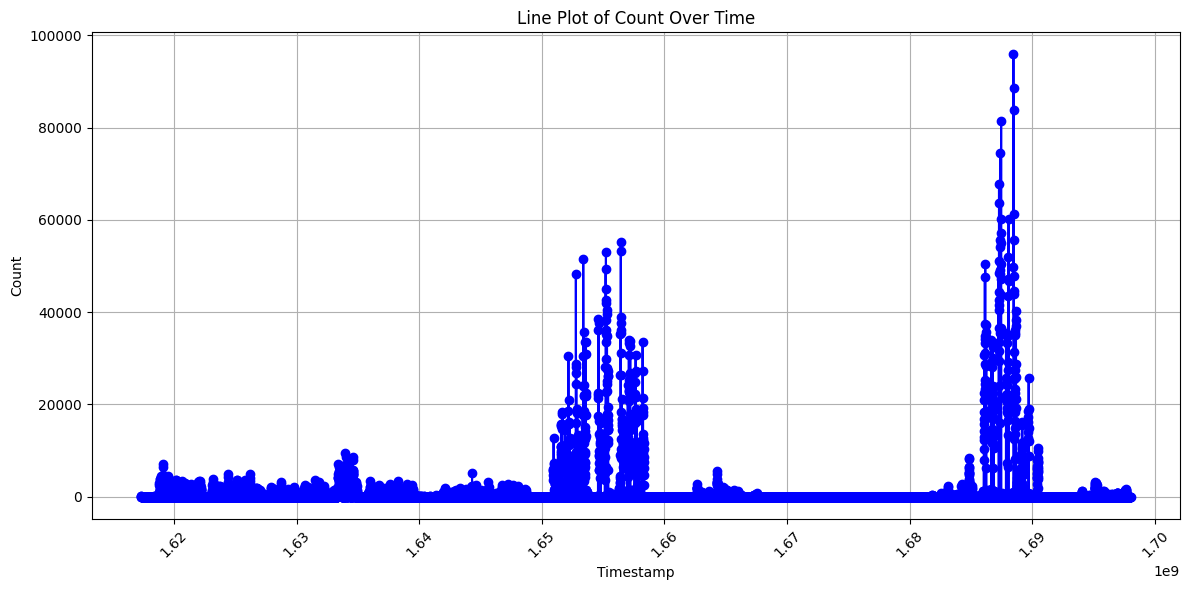

In [6]:
# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['count'], marker='o', linestyle='-', color='b')

# Customize the plot
plt.title('Line Plot of Count Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Count')

# Optionally, you can rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
y = df["count"]
y = y.to_frame(name="count")
y.head()

,count
timestamp,
1.617340e+09,19
1.617343e+09,60
1.617347e+09,82
1.617350e+09,82
1.617354e+09,17


In [8]:
y.value_counts()

count
0        10731
12          24
11          21
7           19
2           18
         ...  
1924         1
1918         1
1917         1
1914         1
95848        1
Name: count, Length: 2225, dtype: int64

In [9]:
X = df
X = X.drop(columns = ["count", 'rhum'], axis=1)
X.head()

,prcp,pres,season,temp,wdir,weco,wspd
timestamp,,,,,,,
1.617340e+09,0.0,1029.4,spring,3.0,33.0,fair,14.8
1.617343e+09,0.0,1029.5,spring,3.6,36.0,fair,16.7
1.617347e+09,0.0,1029.7,spring,4.6,39.0,fair,18.5
1.617350e+09,0.0,1029.9,spring,5.8,44.0,fair,20.4
1.617354e+09,0.0,1030.1,spring,6.7,43.0,cloudy,20.4


In [10]:
num_cols = ['prcp','pres', 'temp','wdir','wspd']
cat_cols = ['season','weco']

In [11]:
num_transformer = Pipeline(steps=[
    ('fillna', SimpleImputer(strategy='median')),
    ('robust_scaler', RobustScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('OHE', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers = [
        ('cat_transformer', cat_transformer, cat_cols),
        ('num_transformer', num_transformer, num_cols)
    ]
)


In [12]:
preprocessor

ColumnTransformer(transformers=[('cat_transformer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OHE',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['season', 'weco']),
                                ('num_transformer',
                                 Pipeline(steps=[('fillna',
                                                  SimpleImputer(strategy='median')),
                                                 ('robust_scaler',
                                                  RobustScaler())]),
                                 ['prcp', 'pres', 'temp', 'wdir', 'wspd'])])

In [149]:
#!pip install --upgrade  xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 4.3 MB/s eta 0:00:0000:0100:01


In [150]:
from xgboost import XGBClassifier

In [20]:
model_lr = RandomForestRegressor(criterion='absolute_error',
                                  n_estimators=80,
                                  max_depth=10,
                                  n_jobs=-1
                                  )


In [176]:
model_lr = RandomForestClassifier()

In [152]:
# Calculate scale_pos_weight for handling class imbalance
scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight,
                          learning_rate=0.1,
                          n_estimators=100,
                          eval_metric='mae')

In [24]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ('model', model_lr)
])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3
                                                    )

In [26]:
pipeline.fit(X_train, y_train)

/Users/Carmen/.pyenv/versions/S02_BLU03/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OHE',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['season', 'weco']),
                                                 ('num_transformer',
                                                  Pipeline(steps=[('fillna',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['prcp', 'pres', 'temp',
                                                   'wdir', 'wspd'])])),
                ('model',
                 RandomForestRegressor(criterion='absolute_error', max_depth=10,
                                       n_estimators=80, n_jobs=-1))])

In [27]:
cv_results = cross_validate(pipeline, X_train, y_train, scoring = ['neg_mean_absolute_error'], cv=5)

/Users/Carmen/.pyenv/versions/S02_BLU03/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

In [189]:
cv_results['test_neg_mean_absolute_error'].mean()

-3021.224185908527

In [171]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

In [191]:
# Hyperparameter space for Randomized Search
param_dist = {
    'model__criterion': ['gini', 'entropy'],
    'model__n_estimators': randint(80, 300),  # Corrected prefix and parameter
    'model__max_depth': randint(10, 20),  # Corrected prefix
    # Removed invalid parameters for RandomForestClassifier
}


# Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings sampled (adjust as needed)
    scoring=['neg_mean_absolute_error'],
    refit='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    random_state=42
)

In [ ]:
random_search.fit(X_train, y_train)

/Users/Carmen/.pyenv/versions/S02_BLU03/lib/python3.10/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/Carmen/.pyenv/versions/S02_BLU03/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Carmen/.pyenv/versions/S02_BLU03/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/Carmen/.pyenv/versions/S02_BLU03/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [108]:
y_pred = pipeline.predict(X_test)

In [116]:
len(y_pred), len(y_test)

(4706, 4706)

In [117]:
y_test

,count
timestamp,
1.680163e+09,0
1.640534e+09,0
1.694016e+09,1220
1.683450e+09,7
1.676844e+09,0
...,...
1.675660e+09,0
1.690081e+09,0
1.630505e+09,441


In [138]:
indexes_y_test = y_test.reset_index(drop=False)['timestamp']

In [28]:
data_test = pd.read_csv('data/test_data.csv').set_index("timestamp")

In [29]:
data_test.drop(["Unnamed: 0"], axis=1, inplace=True)

In [30]:
data_test

,temp,rhum,prcp,wspd,pres,wdir,weco,season
timestamp,,,,,,,,
1.636621e+09,10.1,98.0,0.0,7.4,1023.9,214.0,Overcast,autumn
1.690999e+09,16.1,90.0,0.0,13.0,987.8,274.0,Heavy Rain Shower,summer
1.647054e+09,7.5,90.0,0.0,16.7,1006.1,182.0,Light Rain,winter
1.642018e+09,2.9,93.0,0.0,5.5,1042.4,228.0,Fair,winter
1.654333e+09,15.0,67.0,0.2,20.5,1021.0,60.0,NaN,spring
...,...,...,...,...,...,...,...,...
1.617732e+09,1.8,54.0,0.0,13.0,1020.5,333.0,Fair,spring
1.645222e+09,3.5,66.0,0.0,31.5,1007.3,266.0,Fair,winter
1.695200e+09,19.3,77.0,0.0,40.8,999.4,200.0,Light Rain,summer


In [31]:
# Assuming df is your DataFrame
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


/var/folders/zy/9r4gn9b574gdnv2l9zms0bz40000gn/T/ipykernel_1751/651537946.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [61]:
df

,prcp,pres,rhum,season,temp,wdir,weco,wspd,count
timestamp,,,,,,,,,
1.617340e+09,0.0,1029.4,84.0,spring,3.0,33.0,fair,14.8,19
1.617343e+09,0.0,1029.5,81.0,spring,3.6,36.0,fair,16.7,60
1.617347e+09,0.0,1029.7,NaN,spring,4.6,39.0,fair,18.5,82
1.617350e+09,0.0,1029.9,71.0,spring,5.8,44.0,fair,20.4,82
1.617354e+09,0.0,1030.1,NaN,spring,6.7,43.0,cloudy,20.4,17
...,...,...,...,...,...,...,...,...,...
1.697990e+09,0.0,1008.3,76.0,autumn,12.2,179.0,fair,7.4,20
1.697994e+09,0.0,1008.9,NaN,autumn,11.2,169.0,fair,7.4,9
1.697998e+09,0.0,1009.3,85.0,autumn,10.0,157.0,fair,7.4,16


In [32]:
rows_with_nan = data_test[data_test.isna().any(axis=1)]
num_rows_with_nan = len(rows_with_nan)
print("Number of rows with NaN in any columns:", num_rows_with_nan)
print("Number of rows total:", data_test.shape[0])

Number of rows with NaN in any columns: 84
Number of rows total: 6722


In [33]:
y_test_data = pipeline.predict(data_test)

In [34]:
unique, counts = np.unique(y_test_data, return_counts=True)

In [35]:
unique

array([0.0000000e+00, 1.2500000e-02, 2.5000000e-02, 3.7500000e-02,
       5.0000000e-02, 6.2500000e-02, 8.7500000e-02, 1.0000000e-01,
       1.3750000e-01, 1.5000000e-01, 1.8750000e-01, 2.0000000e-01,
       2.5000000e-01, 2.7500000e-01, 3.1250000e-01, 3.5000000e-01,
       3.7500000e-01, 3.8750000e-01, 4.0000000e-01, 4.1250000e-01,
       4.3750000e-01, 6.0000000e-01, 7.1250000e-01, 7.5000000e-01,
       7.7500000e-01, 8.0000000e-01, 8.1250000e-01, 8.3750000e-01,
       8.6250000e-01, 9.0625000e-01, 9.1250000e-01, 9.5000000e-01,
       9.6250000e-01, 9.6875000e-01, 1.0000000e+00, 1.1250000e+00,
       1.1625000e+00, 1.2062500e+00, 1.2125000e+00, 1.2375000e+00,
       1.2500000e+00, 1.2562500e+00, 1.2750000e+00, 1.3750000e+00,
       1.3875000e+00, 1.4875000e+00, 1.5312500e+00, 1.5750000e+00,
       1.7375000e+00, 1.7625000e+00, 1.9750000e+00, 2.0125000e+00,
       2.0312500e+00, 2.0500000e+00, 2.1500000e+00, 2.1875000e+00,
       2.2250000e+00, 2.2437500e+00, 2.3062500e+00, 2.4250000e

In [36]:
counts

array([4640,    3,    7,  738,    1,  158,    3,    3,    1,    8,    3,
        107,    1,    1,    2,  102,    1,   22,    1,    2,    1,    1,
         20,    7,   34,    1,   10,    2,    1,    1,    3,    1,    2,
          1,    1,    3,    3,   10,    2,    7,    1,    4,    2,    4,
          1,   11,    1,    1,    1,    1,    6,    2,    1,    1,    2,
          1,    1,   26,   29,    4,   50,    1,   45,    2,    1,    2,
         32,    1,    2,    1,    1,    2,    1,    8,    2,    1,  143,
          1,    1,    1,    1,    6,    1,    1,    2,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    3,    3,    2,    1,    1,
          1,    2,    1,    3,   16,    1,   11,    2,    1,    1,    2,
          1,    1,    1,    2,    2,    1,    1,    1,    1,    6,    8,
          1,    1,    1,    2,    1,    1,    1,    2,    1,    2,    1,
          1,    1,    1,    1,    1,    1,    6,    1,    2,    1,    1,
          1,    1,    4,    1,   14,    1,    1,   

In [37]:
len(y_test_data), data_test.shape

(6722, (6722, 8))

In [38]:
test_y = pd.DataFrame(y_test_data, columns=['counts'])

In [39]:
len(test_y['counts'].unique())

310

In [40]:
len(test_y)

6722

In [41]:
data_test.index

Index([1636621200.0, 1690999200.0, 1647054000.0, 1642017600.0, 1654333200.0,
       1693659600.0, 1692532800.0, 1627934400.0, 1689757200.0, 1694548800.0,
       ...
       1669982400.0, 1656478800.0, 1631419200.0, 1665298800.0, 1644555600.0,
       1617732000.0, 1645221600.0, 1695200400.0, 1678269600.0, 1625803200.0],
      dtype='float64', name='timestamp', length=6722)

In [42]:

df_concatenated_2 = pd.DataFrame({'timestamp': data_test.index, 'count': test_y['counts']})


In [133]:
df_concatenated_2

,timestamp,count
0,1.636621e+09,1416
1,1.690999e+09,0
2,1.647054e+09,1618
3,1.642018e+09,1251
4,1.654333e+09,0
...,...,...
6717,1.617732e+09,20
6718,1.645222e+09,288
6719,1.695200e+09,2187
6720,1.678270e+09,0


In [43]:
df_concatenated_2.to_csv('baseline_results_3.csv', index = False)